## What is the optimal kelly fraction staking size?

Optimal kelly fraction: 0.25 with end wealth: 3.5412907934752202


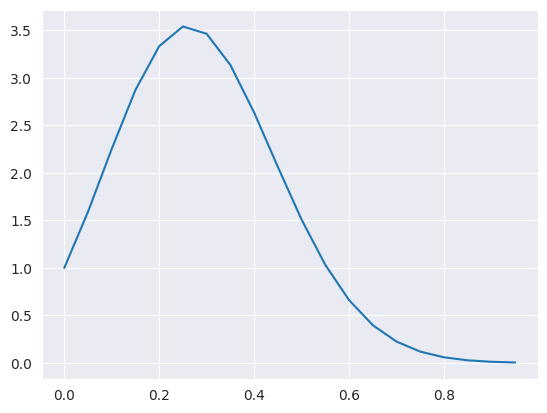

In [76]:
from numpy import argmax
from typing import List
import pickle
import seaborn as sns

TEST_BETS_PATH = "../data/test_payouts.dat"

with open(TEST_BETS_PATH, "rb") as f:
    test_bets_base = pickle.load(f)
    
test_bets_base = [bet for bet in test_bets_base if bet.probability_start > -1]
test_bets = [bet for bet in test_bets_base if bet.bet_offer.odds < 20 and bet.probability_estimate > 0.25]
payouts = [bet.payout for bet in test_bets]

def get_end_wealth(payouts: List[float], kelly_fraction: float) -> float:
    wealth = 1
    
    for payout in payouts:
        wealth *= (1 + kelly_fraction * payout)
        
    return wealth

kelly_fractions = [0 + 0.05 * i for i in range(20)]
end_wealth_snapshots = [get_end_wealth(payouts, kelly_fraction) for kelly_fraction in kelly_fractions]

optimal_kelly_fraction = kelly_fractions[argmax(end_wealth_snapshots)]
    
ax = sns.lineplot(x=kelly_fractions, y=end_wealth_snapshots)
print(f"Optimal kelly fraction: {optimal_kelly_fraction} with end wealth: {max(end_wealth_snapshots)}")

## How much capital is needed with the optimal kelly staking size?

In [77]:
stakes = [bet.stakes for bet in test_bets]

min_stakes = min(stakes) * optimal_kelly_fraction

min_allowed_stakes = 7
required_start_wealth = min_allowed_stakes / min_stakes

print(f"Required start wealth: {required_start_wealth}")

Required start wealth: 685698.6220090233
